In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc("font", family = "Malgun Gothic")

코로나 질량 방출(CME)은 태양의 코로나에서 플라즈마와 자기장이 대량으로 방출되는 현상입니다. 그들은 수십억 톤의 코로나 물질을 방출할 수 있고 배경 태양풍 행성간 자기장(IMF) 강도보다 더 강한 임베디드 자기장(플럭스에서 고정됨)을 전달할 수 있습니다. CME는 초당 250km/s보다 느린 속도에서 최대 3000km/s에 가까운 속도로 태양에서 바깥쪽으로 이동합니다. 지구를 향하는 가장 빠른 CME는 15-18시간 만에 지구에 도착할 수 있습니다. 느린 CME는 도착하는 데 며칠이 걸릴 수 있습니다. 
<hr>
mpa가 180에 가까울수록 cme가 약한 것, 0에 가까울수록 강한 것

# 전처리

### 1. null 값 바꾸기 ("----" -> Null)

In [9]:
cme = pd.read_csv('mainapp/cme_view/cme_pre.csv')
cme

FileNotFoundError: [Errno 2] No such file or directory: 'mainapp/cme_view/cme_pre.csv'

In [ ]:
for cols in cme.columns:
    cme.loc[cme[cols] == '----', cols] = None

In [ ]:
cme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33740 entries, 0 to 33739
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    33740 non-null  object 
 1   time                                    33740 non-null  object 
 2   Central PA[deg]                         33740 non-null  object 
 3   Angular Width[deg]                      33740 non-null  object 
 4   LineaSpeed [km/s]                       33626 non-null  object 
 5   2nd-order Speed at final height [km/s]  33740 non-null  object 
 6   2nd-order Speed at 20 Rs [km/s]         33740 non-null  object 
 7   Accel[m/s2]                             33740 non-null  object 
 8   Mass[gram]                              20115 non-null  object 
 9   Kinetic Energy[erg]                     20115 non-null  object 
 10  MPA [deg]                               33740 non-null  fl

In [ ]:
cme

,date,time,Central PA[deg],Angular Width[deg],LineaSpeed [km/s],2nd-order Speed at final height [km/s],2nd-order Speed at 20 Rs [km/s],Accel[m/s2],Mass[gram],Kinetic Energy[erg],MPA [deg],"Movies, plots, & links",Remarks
0,1996/01/11,00:14:36,267,18,499,426,0,-64.3*1,None,None,272.0,SXT\nPHTX\nDST\nJava Movie,Only C3
1,1996/01/13,22:08:30,265,16,290,303,372,2.8*1,None,None,266.0,SXT\nPHTX\nDST\nJava Movie,Only C3
2,1996/01/15,07:01:10,262,43,525,454,0,-31.1,None,None,272.0,SXT\nPHTX\nDST\nJava Movie,Only C3
3,1996/01/22,03:11:01,105,37,267,130,0,-126.3*1,7.1e+13*2,2.5e+28*2,103.0,C3\nSXT\nPHTX\nDST\nJava Movie,Very Poor Event; Only C3
4,1996/01/26,09:16:19,90,27,262,271,322,1.9*1,3.0e+14,1.0e+29,90.0,C3\nSXT\nPHTX\nDST\nJava Movie,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33735,2023/03/30,07:48:05,243,224,487,405,443,-4.3*1,None,None,238.0,C2\nC3\nPHTX\nDST\nJava Movie,Partial Halo
33736,2023/03/30,21:48:06,244,40,381,496,524,8.3*1,None,None,261.0,C2\nC3\nPHTX\nDST\nJava Movie,Poor Event
33737,2023/03/31,09:24:20,280,39,356,321,266,-3.3*1,None,None,288.0,C2\nC3\nPHTX\nDST\nJava Movie,NaN
33738,2023/03/31,14:57:20,319,221,755,813,783,5.7,None,None,310.0,C2\nC3\nPHTX\nDST\nJava Movie,Partial Halo


### 2. mpa 값 보정 (180 초과인 값은 360에서 뺀다)

In [ ]:
cme.loc[cme["MPA [deg]"] > 180, "MPA [deg]"] = 360 - cme.loc[cme["MPA [deg]"] > 180, "MPA [deg]"]

In [ ]:
cme["MPA [deg]"].describe()

count    33740.000000
mean        88.567161
std         40.147312
min          0.000000
25%         62.000000
50%         90.000000
75%        116.000000
max        180.000000
Name: MPA [deg], dtype: float64

In [ ]:
cme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33740 entries, 0 to 33739
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    33740 non-null  object 
 1   time                                    33740 non-null  object 
 2   Central PA[deg]                         33740 non-null  object 
 3   Angular Width[deg]                      33740 non-null  object 
 4   LineaSpeed [km/s]                       33626 non-null  object 
 5   2nd-order Speed at final height [km/s]  33740 non-null  object 
 6   2nd-order Speed at 20 Rs [km/s]         33740 non-null  object 
 7   Accel[m/s2]                             33740 non-null  object 
 8   Mass[gram]                              20115 non-null  object 
 9   Kinetic Energy[erg]                     20115 non-null  object 
 10  MPA [deg]                               33740 non-null  fl

### 3. 속력의 null 값은 평균으로 대체

In [ ]:
cme['LineaSpeed [km/s]'].isnull().sum()

114

In [ ]:
mean_speed = pd.to_numeric(cme['LineaSpeed [km/s]'], errors='coerce').astype('Int64').dropna().mean()
mean_speed

378.70600130851125

In [ ]:
cme['LineaSpeed [km/s]'] = cme['LineaSpeed [km/s]'].fillna(mean_speed)

### 4. date를 datetime type으로 변환하기

In [ ]:
cme['date'] = pd.to_datetime(cme['date']).dt.strftime('%Y%m%d')

In [ ]:
cme

,date,time,Central PA[deg],Angular Width[deg],LineaSpeed [km/s],2nd-order Speed at final height [km/s],2nd-order Speed at 20 Rs [km/s],Accel[m/s2],Mass[gram],Kinetic Energy[erg],MPA [deg],"Movies, plots, & links",Remarks
0,19960111,00:14:36,267,18,499,426,0,-64.3*1,None,None,88.0,SXT\nPHTX\nDST\nJava Movie,Only C3
1,19960113,22:08:30,265,16,290,303,372,2.8*1,None,None,94.0,SXT\nPHTX\nDST\nJava Movie,Only C3
2,19960115,07:01:10,262,43,525,454,0,-31.1,None,None,88.0,SXT\nPHTX\nDST\nJava Movie,Only C3
3,19960122,03:11:01,105,37,267,130,0,-126.3*1,7.1e+13*2,2.5e+28*2,103.0,C3\nSXT\nPHTX\nDST\nJava Movie,Very Poor Event; Only C3
4,19960126,09:16:19,90,27,262,271,322,1.9*1,3.0e+14,1.0e+29,90.0,C3\nSXT\nPHTX\nDST\nJava Movie,Poor Event; Only C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33735,20230330,07:48:05,243,224,487,405,443,-4.3*1,None,None,122.0,C2\nC3\nPHTX\nDST\nJava Movie,Partial Halo
33736,20230330,21:48:06,244,40,381,496,524,8.3*1,None,None,99.0,C2\nC3\nPHTX\nDST\nJava Movie,Poor Event
33737,20230331,09:24:20,280,39,356,321,266,-3.3*1,None,None,72.0,C2\nC3\nPHTX\nDST\nJava Movie,NaN
33738,20230331,14:57:20,319,221,755,813,783,5.7,None,None,50.0,C2\nC3\nPHTX\nDST\nJava Movie,Partial Halo


# 시각화

### 1. 속력

In [ ]:
cme['LineaSpeed [km/s]'] = cme['LineaSpeed [km/s]'].astype('int')

In [ ]:
# 같은 날 다른 시각 데이터에 대해서는 최대값을 취한다
cme_g = cme.groupby('date')['LineaSpeed [km/s]'].max().reset_index()
cme_g

,date,LineaSpeed [km/s]
0,19960111,499
1,19960113,290
2,19960115,525
3,19960122,267
4,19960126,262
...,...,...
8697,20230326,607
8698,20230327,1216
8699,20230329,1538
8700,20230330,487


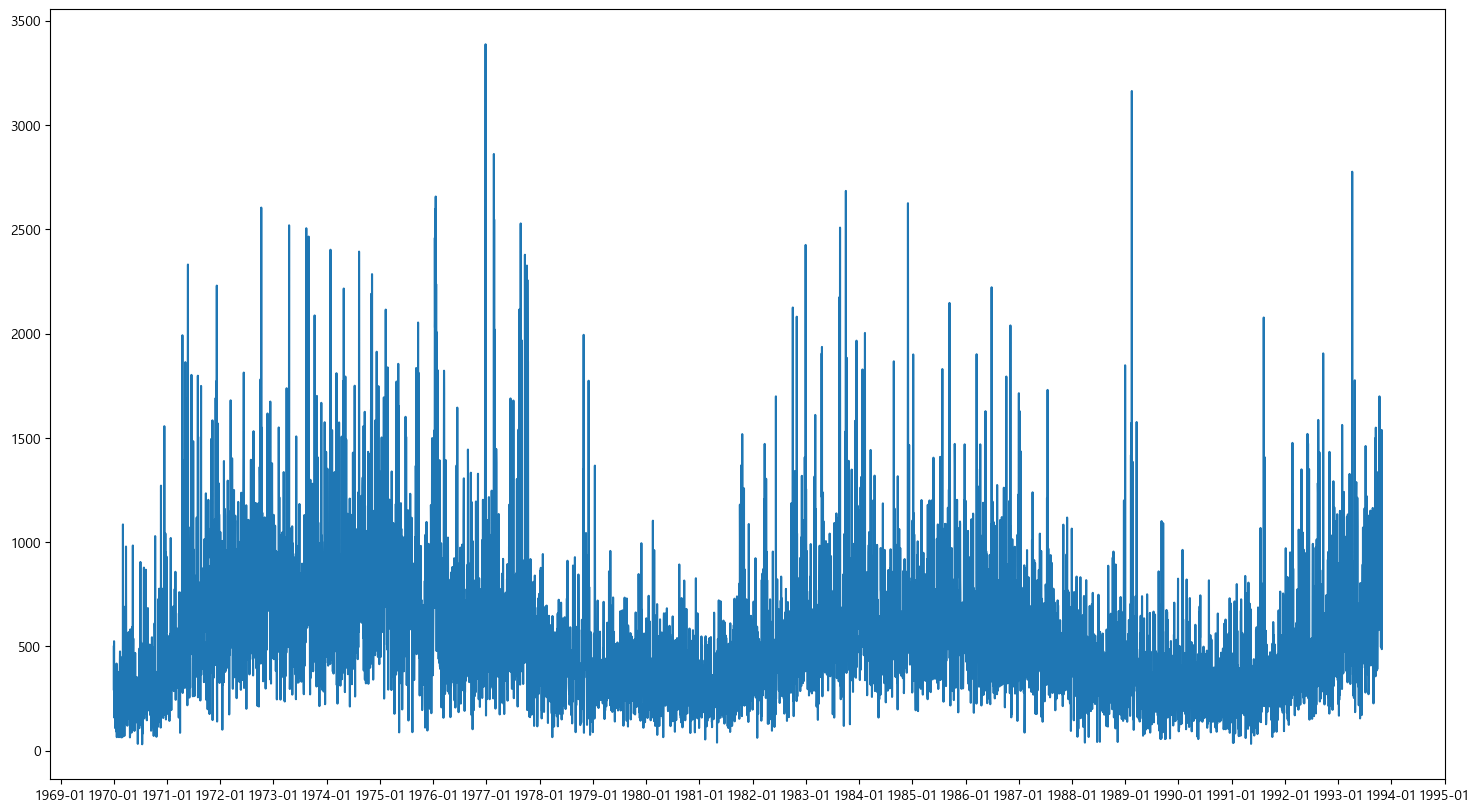

In [ ]:
import matplotlib.dates as mdates


plt.figure(figsize=[18, 10])

plt.plot(cme_g['date'], cme_g['LineaSpeed [km/s]'])

## x축을 년/월로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

## 1년 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.show()


### MPA

In [ ]:
# 같은 날 다른 시각 데이터에 대해서는 최대값을 취한다
cme_g2 = cme.groupby('date')['MPA [deg]'].max().reset_index()
cme_g2

,date,MPA [deg]
0,19960111,88.0
1,19960113,94.0
2,19960115,88.0
3,19960122,103.0
4,19960126,90.0
...,...,...
8697,20230326,131.0
8698,20230327,140.0
8699,20230329,177.0
8700,20230330,122.0


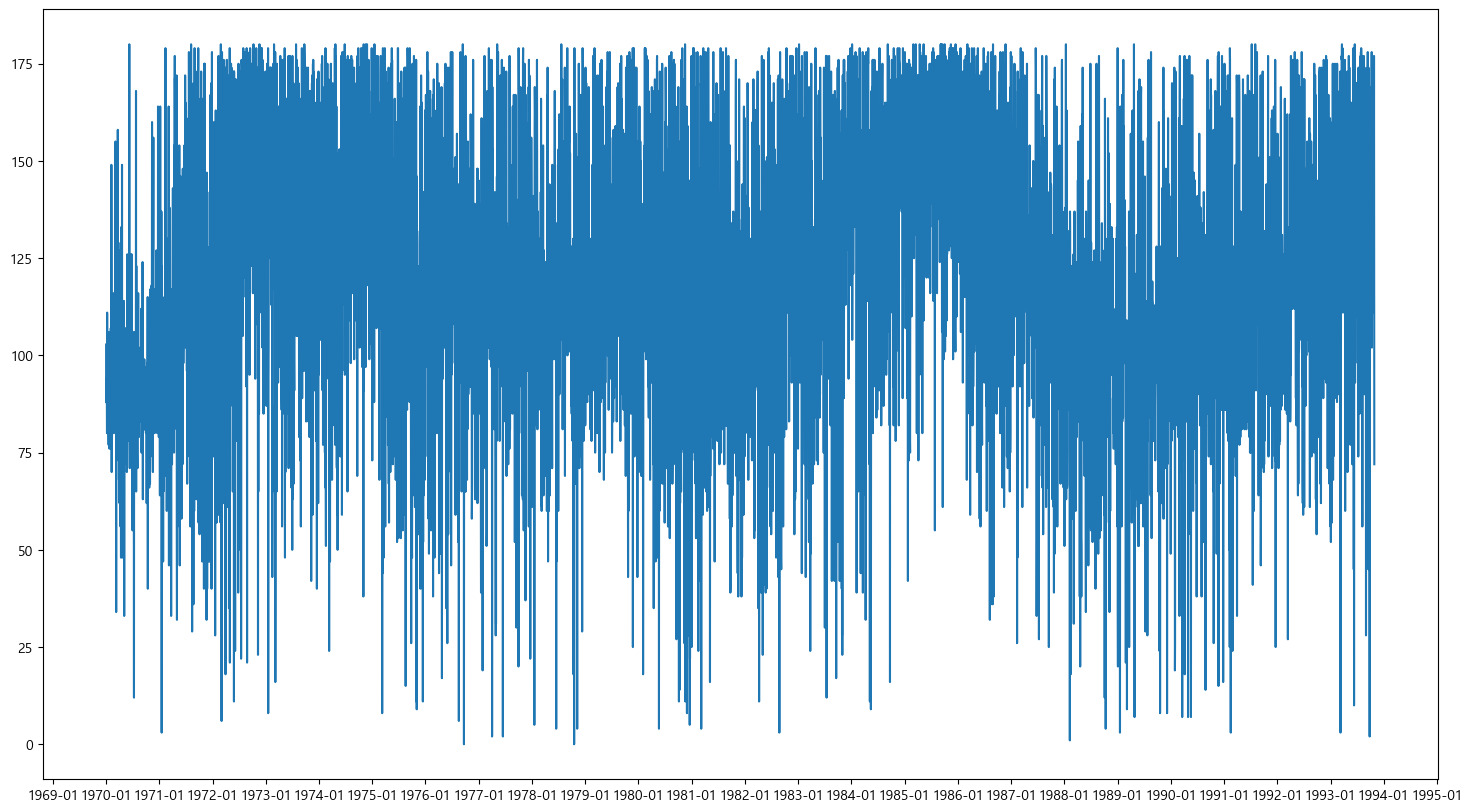

In [ ]:
plt.figure(figsize=[18, 10])

plt.plot(cme_g2['date'], cme_g2['MPA [deg]'])

## x축을 년/월로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

## 1년 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())


plt.show()

### 흑점수 데이터 불러오기

In [ ]:
sunspot_1 = pd.read_csv('./mainapp/cme_view/sunspot(1818~2023).csv')
sunspot_1

,년도,월,일,날짜(연간비율),흑점수,표준편차,관찰,Indicator
0,1818,1,1,1818.001,-1,-1.0,0,1
1,1818,1,2,1818.004,-1,-1.0,0,1
2,1818,1,3,1818.007,-1,-1.0,0,1
3,1818,1,4,1818.010,-1,-1.0,0,1
4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...
73713,2019,10,27,2019.821,0,0.0,34,0
73714,2019,10,28,2019.823,0,0.0,34,0
73715,2019,10,29,2019.826,0,0.0,30,0
73716,2019,10,30,2019.829,0,0.0,24,0


In [ ]:
sunspot_1['년월일'] = sunspot_1['년도'].astype('str')+sunspot_1['월'].astype('str').str.zfill(2)+sunspot_1['일'].astype('str').str.zfill(2)
sunspot_1

,년도,월,일,날짜(연간비율),흑점수,표준편차,관찰,Indicator,년월일
0,1818,1,1,1818.001,-1,-1.0,0,1,18180101
1,1818,1,2,1818.004,-1,-1.0,0,1,18180102
2,1818,1,3,1818.007,-1,-1.0,0,1,18180103
3,1818,1,4,1818.010,-1,-1.0,0,1,18180104
4,1818,1,5,1818.012,-1,-1.0,0,1,18180105
...,...,...,...,...,...,...,...,...,...
73713,2019,10,27,2019.821,0,0.0,34,0,20191027
73714,2019,10,28,2019.823,0,0.0,34,0,20191028
73715,2019,10,29,2019.826,0,0.0,30,0,20191029
73716,2019,10,30,2019.829,0,0.0,24,0,20191030


### 흑점수 뒷부분 데이터

In [ ]:
sunspot_2 = pd.read_csv('../data/일별_태양_활동_데이터(2011.12.01~2023.03.01).csv')
sunspot_2

,관측일자(년),관측일자(년월),관측일자(년월일),흑점수,흑점면적,라디오플럭스(F107),배경플럭스,X선_C등급,X선_M등급,X선_X등급,X선_S등급,플레어1광학값,플레어2광학값,플레어3광학값
0,2011,2011-12,2011-12-01,89,540,155,B5.7,2,0,0,2,0,0,0
1,2011,2011-12,2011-12-02,106,630,157,B5.8,3,0,0,0,0,0,0
2,2011,2011-12,2011-12-03,138,870,160,B6.0,2,0,0,3,0,0,0
3,2011,2011-12,2011-12-04,154,960,164,B5.4,3,0,0,1,0,0,0
4,2011,2011-12,2011-12-05,185,1175,158,B5.2,8,0,0,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2023,2023-02,2023-02-25,129,980,152,*,5,2,0,0,0,0,1
4078,2023,2023-02,2023-02-26,120,930,159,*,6,0,0,0,0,0,0
4079,2023,2023-02,2023-02-27,192,1030,161,*,1,0,0,2,0,0,0
4080,2023,2023-02,2023-02-28,100,1110,161,*,6,1,0,4,0,0,0


In [ ]:
sunspot_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   관측일자(년)       4082 non-null   int64 
 1   관측일자(년월)      4082 non-null   object
 2   관측일자(년월일)     4082 non-null   object
 3   흑점수           4082 non-null   int64 
 4   흑점면적          4082 non-null   int64 
 5   라디오플럭스(F107)  4082 non-null   int64 
 6   배경플럭스         4082 non-null   object
 7   X선_C등급        4082 non-null   int64 
 8   X선_M등급        4082 non-null   int64 
 9   X선_X등급        4082 non-null   int64 
 10  X선_S등급        4082 non-null   int64 
 11  플레어1광학값       4082 non-null   int64 
 12  플레어2광학값       4082 non-null   int64 
 13  플레어3광학값       4082 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 446.6+ KB


In [ ]:
sunspot_2['관측일자(년월일)'] = pd.to_datetime(sunspot_2['관측일자(년월일)'])
sunspot_2['년월일'] = sunspot_2['관측일자(년월일)'].dt.strftime('%Y%m%d')
#sunspot_2.rename({'관측일자(년월일)':'년월일'}, inplace=True)
sunspot_2

,관측일자(년),관측일자(년월),관측일자(년월일),흑점수,흑점면적,라디오플럭스(F107),배경플럭스,X선_C등급,X선_M등급,X선_X등급,X선_S등급,플레어1광학값,플레어2광학값,플레어3광학값,년월일
0,2011,2011-12,2011-12-01,89,540,155,B5.7,2,0,0,2,0,0,0,20111201
1,2011,2011-12,2011-12-02,106,630,157,B5.8,3,0,0,0,0,0,0,20111202
2,2011,2011-12,2011-12-03,138,870,160,B6.0,2,0,0,3,0,0,0,20111203
3,2011,2011-12,2011-12-04,154,960,164,B5.4,3,0,0,1,0,0,0,20111204
4,2011,2011-12,2011-12-05,185,1175,158,B5.2,8,0,0,7,0,0,0,20111205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4077,2023,2023-02,2023-02-25,129,980,152,*,5,2,0,0,0,0,1,20230225
4078,2023,2023-02,2023-02-26,120,930,159,*,6,0,0,0,0,0,0,20230226
4079,2023,2023-02,2023-02-27,192,1030,161,*,1,0,0,2,0,0,0,20230227
4080,2023,2023-02,2023-02-28,100,1110,161,*,6,1,0,4,0,0,0,20230228


### 두 흑점 데이터프레임에서 년월일, 흑점수 컬럼만 뽑아서 concat

In [ ]:
sunspot1_cut = sunspot_1[['년월일', '흑점수']]
sunspot2_cut = sunspot_2[['년월일', '흑점수']]
#sunspot2_cut.rename({'관측일자(년월일)':'년월일'}, inplace=True)
sunspot = pd.concat([sunspot1_cut, sunspot2_cut], ignore_index = True)
sunspot
#sunspot2_cut

,년월일,흑점수
0,18180101,-1
1,18180102,-1
2,18180103,-1
3,18180104,-1
4,18180105,-1
...,...,...
77795,20230225,129
77796,20230226,120
77797,20230227,192
77798,20230228,100


In [ ]:
sunspot.to_csv('./preprocessed/sunspot(1818~2023).csv', encoding='utf-8-sig', index = False)

### 흑점수 + 속력 시각화

In [ ]:
# sunspot 과 cme merge
merged_df = pd.merge(cme_g, sunspot, left_on='date', right_on = '년월일', how='left')
merged_df

,date,LineaSpeed [km/s],년월일,흑점수
0,19960111,499,19960111,0.0
1,19960113,290,19960113,0.0
2,19960115,525,19960115,0.0
3,19960122,267,19960122,0.0
4,19960126,262,19960126,10.0
...,...,...,...,...
11332,20230326,607,NaN,NaN
11333,20230327,1216,NaN,NaN
11334,20230329,1538,NaN,NaN
11335,20230330,487,NaN,NaN


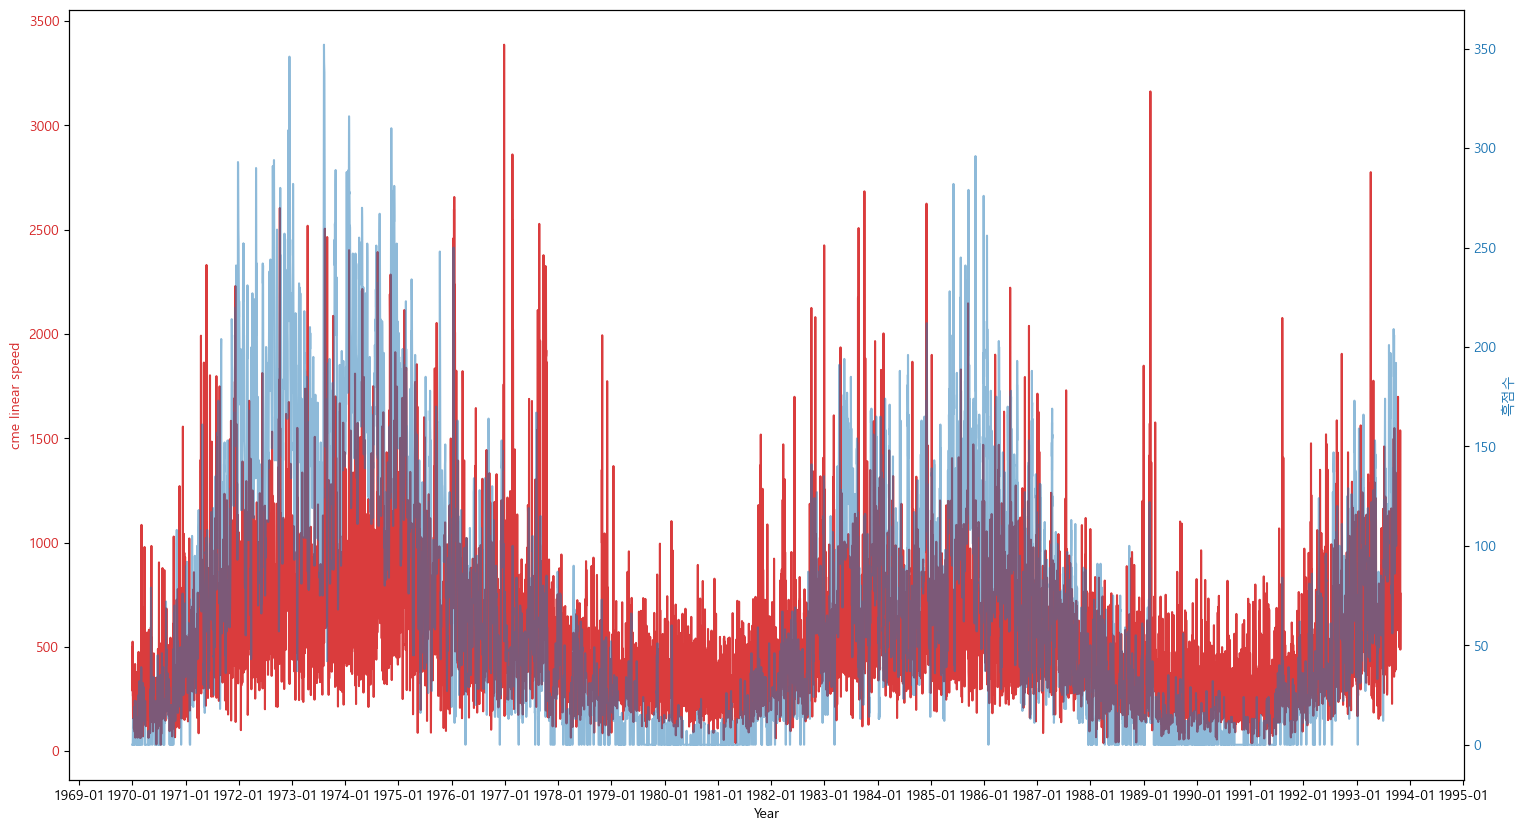

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=[18, 10])

# 첫 번째 y축 그래프 (cme 속력)
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('cme linear speed', color=color)
ax1.plot(merged_df['date'], merged_df['LineaSpeed [km/s]'], color=color, alpha=0.9)
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 그래프
ax2 = ax1.twinx()  # 기존의 y축과 공유하는 새로운 y축 생성

color = 'tab:blue'
ax2.set_ylabel('흑점수', color=color)
ax2.plot(merged_df['date'], merged_df['흑점수'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

## x축을 년/월로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

## 1년 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# 그래프 표시
plt.show()

### 흑점수 + MPA

In [ ]:
cme_g2

,date,MPA [deg]
0,19960111,88.0
1,19960113,94.0
2,19960115,88.0
3,19960122,103.0
4,19960126,90.0
...,...,...
8697,20230326,131.0
8698,20230327,140.0
8699,20230329,177.0
8700,20230330,122.0


In [ ]:
merged_df2 = pd.merge(cme_g2, sunspot, left_on='date', right_on = '년월일', how='left')
merged_df2

,date,MPA [deg],년월일,흑점수
0,19960111,88.0,19960111,0.0
1,19960113,94.0,19960113,0.0
2,19960115,88.0,19960115,0.0
3,19960122,103.0,19960122,0.0
4,19960126,90.0,19960126,10.0
...,...,...,...,...
11332,20230326,131.0,NaN,NaN
11333,20230327,140.0,NaN,NaN
11334,20230329,177.0,NaN,NaN
11335,20230330,122.0,NaN,NaN


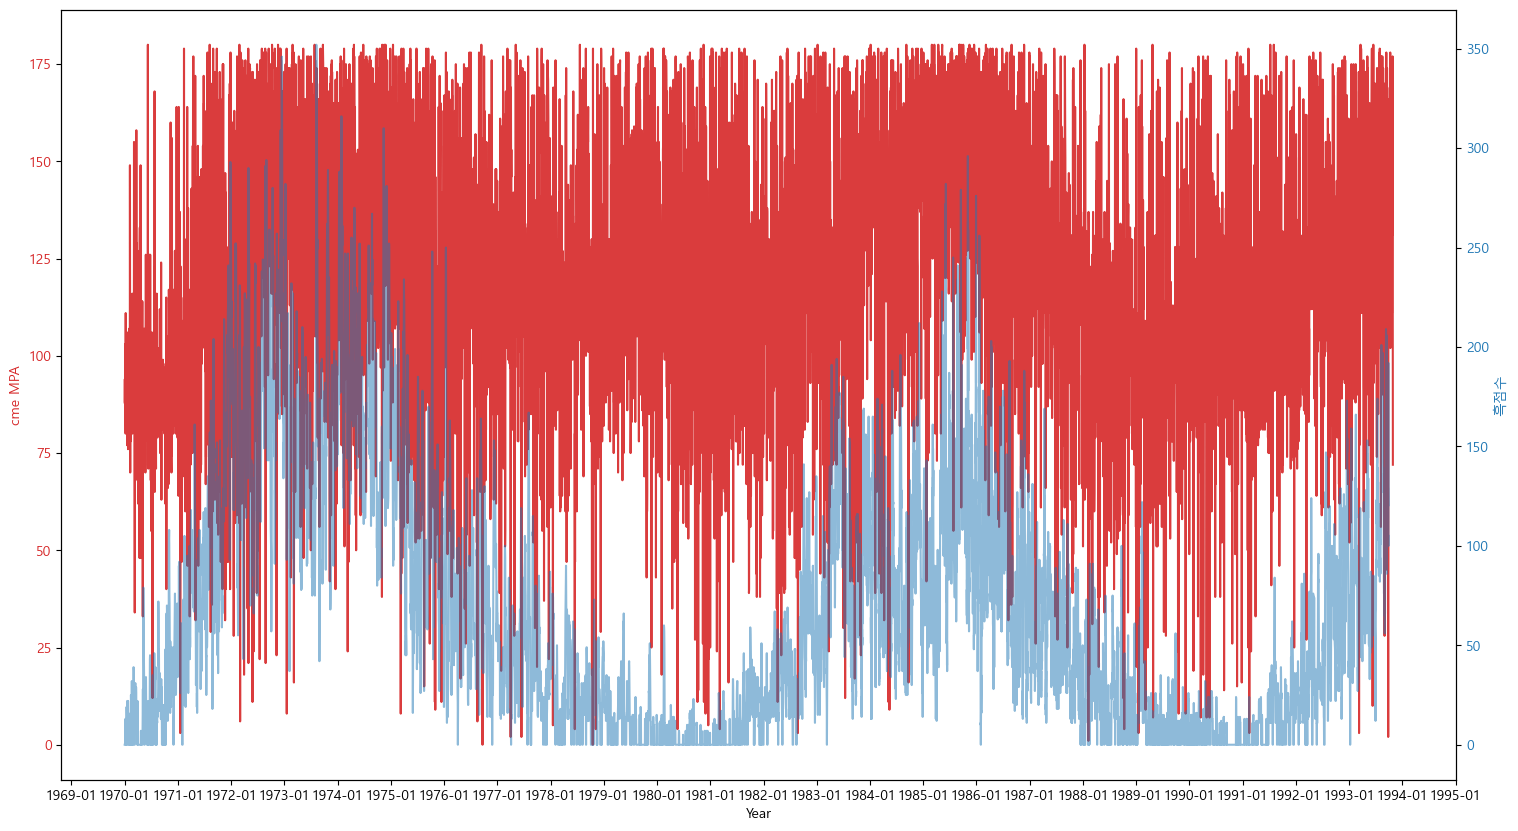

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=[18, 10])

# 첫 번째 y축 그래프 (mpa)
color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('cme MPA', color=color)
ax1.plot(merged_df2['date'], merged_df2['MPA [deg]'], color=color, alpha=0.9)
ax1.tick_params(axis='y', labelcolor=color)

# 두 번째 y축 그래프 (흑점수)
ax2 = ax1.twinx()  # 기존의 y축과 공유하는 새로운 y축 생성

color = 'tab:blue'
ax2.set_ylabel('흑점수', color=color)
ax2.plot(merged_df2['date'], merged_df2['흑점수'], color=color, alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)

## x축을 년/월로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

## 1년 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# 그래프 표시
plt.show()

### linear speed + Mpa + sunspot

In [ ]:
merged_df3 = pd.merge(merged_df, 
                      merged_df2[['date','MPA [deg]']], 
                      left_on='date', right_on = 'date', how='left')
merged_df3

,date,LineaSpeed [km/s],년월일,흑점수,MPA [deg]
0,19960111,499,19960111,0.0,88.0
1,19960113,290,19960113,0.0,94.0
2,19960115,525,19960115,0.0,88.0
3,19960122,267,19960122,0.0,103.0
4,19960126,262,19960126,10.0,90.0
...,...,...,...,...,...
16602,20230326,607,NaN,NaN,131.0
16603,20230327,1216,NaN,NaN,140.0
16604,20230329,1538,NaN,NaN,177.0
16605,20230330,487,NaN,NaN,122.0


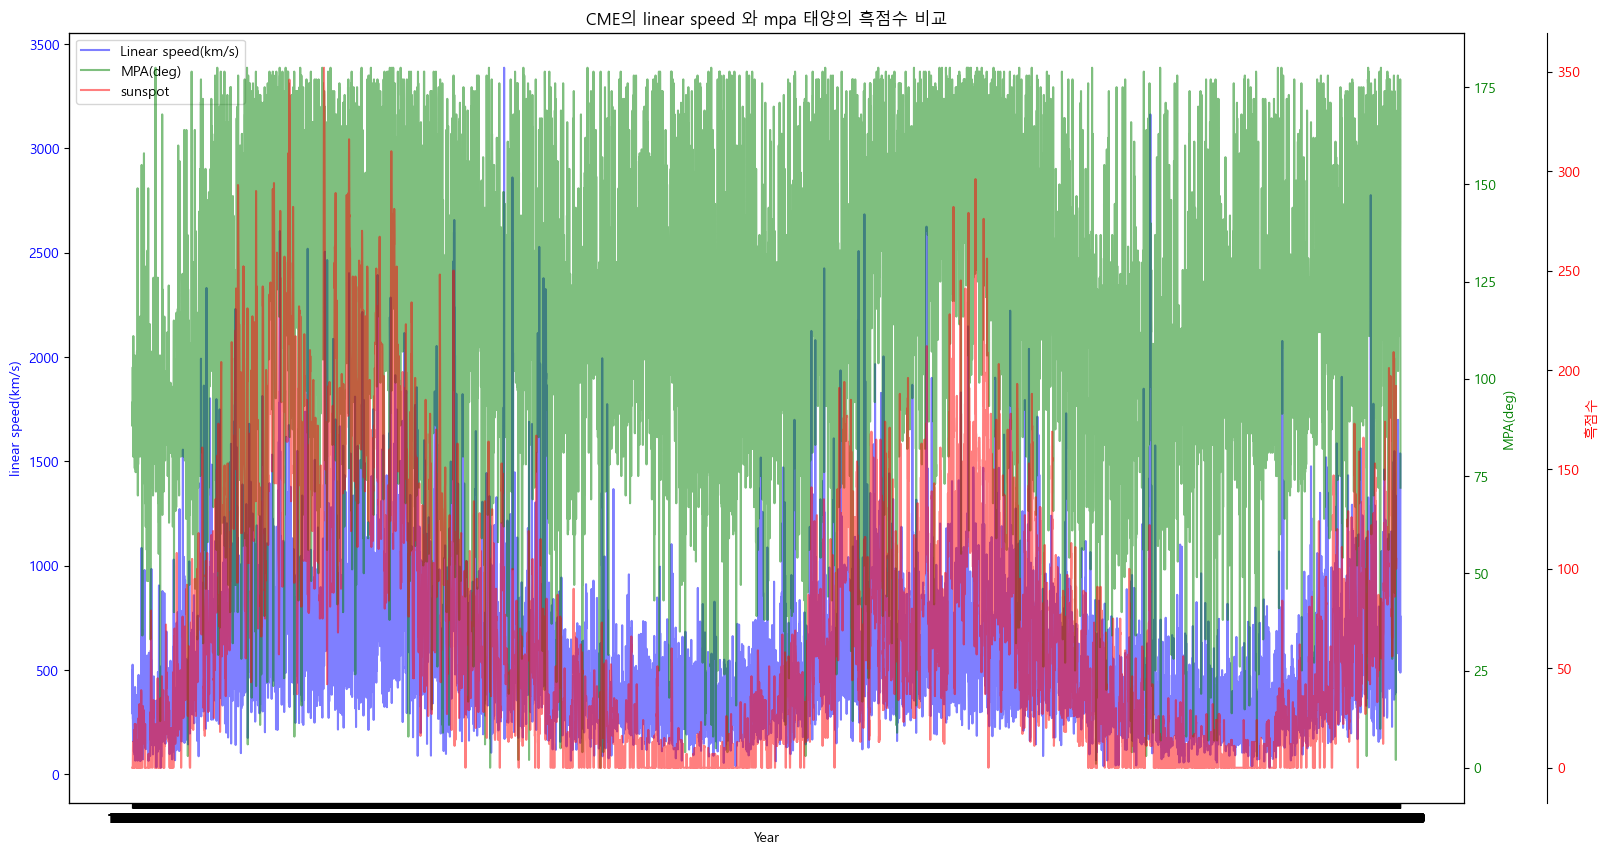

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=[18, 10])

# 첫 번째 y축 그래프 (cme 속력)
ax1.plot(merged_df3['date'], merged_df3['LineaSpeed [km/s]'], 
         color='blue', label='Linear speed(km/s)', alpha=0.5)
ax1.set_ylabel('linear speed(km/s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# 두번째 y축 그래프 (mpa)
ax2 = ax1.twinx()
ax2.plot(merged_df3['date'], merged_df3['MPA [deg]'], 
         color='green', label='MPA(deg)', alpha=0.5)
ax2.set_ylabel('MPA(deg)', color='green')
ax2.tick_params(axis='y', labelcolor='green')


# 세 번째 y축 그래프 (흑점수)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 오른쪽 Y축의 위치를 조정
ax3.plot(merged_df3['date'], merged_df3['흑점수'], 
         color='red', label='sunspot', alpha=0.5)
ax3.set_ylabel('흑점수', color='red')
ax3.tick_params(axis='y', labelcolor='red')


# 그래프의 레이블 및 범례 추가
lines = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')


# X축 레이블을 날짜 형식으로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.set_xlabel('Year')

## 1년 단위로 표시
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.title('CME의 linear speed 와 mpa 태양의 흑점수 비교')
plt.show()


# 월별 비교

In [ ]:
merged_df3['년월'] = pd.to_datetime(merged_df3['date']).dt.to_period(freq='M')

In [ ]:
cme_month = merged_df3.groupby('년월')[['LineaSpeed [km/s]', 'MPA [deg]', '흑점수']].mean().reset_index()
cme_month

,년월,LineaSpeed [km/s],MPA [deg],흑점수
0,1996-01,333.500000,91.833333,3.833333
1,1996-02,246.600000,93.000000,2.400000
2,1996-03,194.692308,91.307692,12.153846
3,1996-04,237.071429,97.071429,4.857143
4,1996-05,313.909091,87.545455,7.636364
...,...,...,...,...
318,2022-11,625.100000,137.500000,65.100000
319,2022-12,766.666667,137.666667,110.133333
320,2023-01,759.354839,144.838710,133.354839
321,2023-02,822.464286,129.392857,126.750000


In [ ]:
cme_month['년월'] = cme_month['년월'].astype('str')
cme_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   년월                 323 non-null    object 
 1   LineaSpeed [km/s]  323 non-null    float64
 2   MPA [deg]          323 non-null    float64
 3   흑점수                323 non-null    float64
dtypes: float64(3), object(1)
memory usage: 10.2+ KB


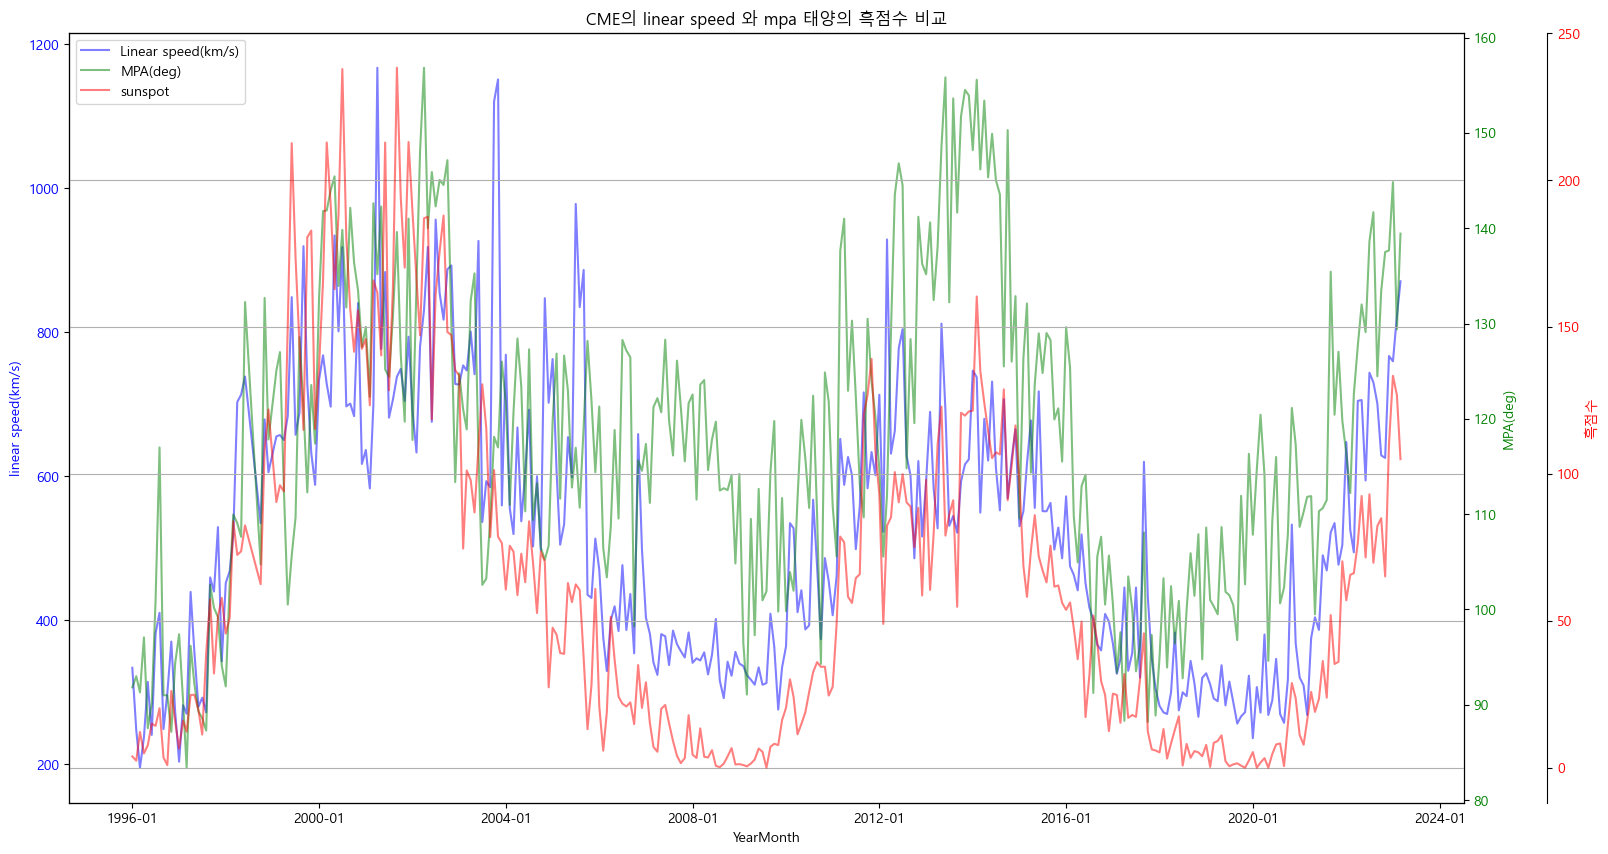

In [ ]:
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=[18, 10])

# 첫 번째 y축 그래프 (cme 속력)
ax1.plot(pd.to_datetime(cme_month['년월']), cme_month['LineaSpeed [km/s]'], 
         color='blue', label='Linear speed(km/s)', alpha=0.5)
ax1.set_ylabel('linear speed(km/s)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# 두번째 y축 그래프 (mpa)
ax2 = ax1.twinx()
ax2.plot(pd.to_datetime(cme_month['년월']), cme_month['MPA [deg]'], 
         color='green', label='MPA(deg)', alpha=0.5)
ax2.set_ylabel('MPA(deg)', color='green')
ax2.tick_params(axis='y', labelcolor='green')


# 세 번째 y축 그래프 (흑점수)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # 오른쪽 Y축의 위치를 조정
ax3.plot(pd.to_datetime(cme_month['년월']), cme_month['흑점수'], 
         color='red', label='sunspot', alpha=0.5)
ax3.set_ylabel('흑점수', color='red')
ax3.tick_params(axis='y', labelcolor='red')


# 그래프의 레이블 및 범례 추가
lines = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')


# X축 레이블을 날짜 형식으로 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
## 1년 단위로 표시
#plt.gca().xaxis.set_major_locator(mdates.YearLocator())
ax1.set_xlabel('YearMonth')

plt.title('CME의 linear speed 와 mpa 태양의 흑점수 비교')
plt.grid(True)
plt.show()